# Questions
1- what is the ratio of arabs to non arabs

2- What is the count of all group ages

3- The education degree for all participations

4- what is the genre of participations

5- what is the most commo profession

6-what is the most popular programming language

In [10]:
#importing the  csv file
import pandas as pd
from matplotlib import pyplot as plt
import os
df=pd.read_csv(r'kaggle_survey_2021_responses.csv')
df.head()

C:\Users\shado\AppData\Local\Temp\ipykernel_6456\569813301.py:5: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'kaggle_survey_2021_responses.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


# Data cleaning
1-converting the data types into convenient types 
2- creating arab column to get only the arab participations


In [11]:
#making the questions into a different variable and delting it to clean the data frame
questions=df.iloc[0,:]
questions
df1=df.drop(index=0)

In [12]:
#converting  all int columns from object to int to ease mathematical operations
for  i in df1.columns :
    if df1[i].str.isnumeric().all():
        df1[i]=pd.to_numeric(df1[i])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [13]:
#getting list of all arab countries
ountriesarabs='Algeria,Bahrain,Egypt,Iraq,Jordan,Kuwait,Lebanon,Libya,Mauritania,Morocco,Oman,Palestine,Qatar,Saudi Arabia,Sudan,Syria,Tunisia,United Arab Emirates,Yemen'
arab_countries=ountriesarabs.split(',')


#Making a variable for just arabs and non arabs
arabs_cols=df1[df1['Q3'].isin(arab_countries)]
non_arab_cols=df1[df1['Q3'].isin(arab_countries)==False]


In [14]:
#renaming genres
others=df1['Q2'].replace(['Prefer not to say','Nonbinary','Prefer to self-describe'],'other')
others

1        Man
2        Man
3        Man
4        Man
5        Man
        ... 
25969    Man
25970    Man
25971    Man
25972    Man
25973    Man
Name: Q2, Length: 25973, dtype: object

# analyzing

Text(0.5, 1.0, 'Arabs to non arabs')

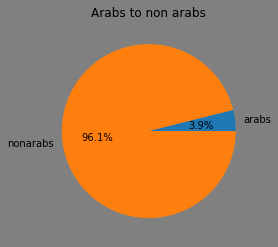

In [15]:
# the ratio of arabs to non arabs 
s=arabs_cols['Q1'].count()
ss=non_arab_cols['Q1'].count()
sss=[s,ss]
ssss=['arabs','nonarabs']
fig,axes=plt.subplots()
fig.patch.set_facecolor('grey')
axes.pie(sss ,labels=ssss,autopct='%1.1f%%')
axes.set_title('Arabs to non arabs')

Arabs are considered very low to the the non  arabs

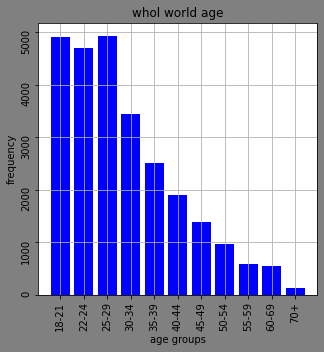

In [16]:
# The age distribution 
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5)) 
fig.patch.set_facecolor('grey')

wholeworldagegroups=df1['Q1'].value_counts().sort_index()
x=wholeworldagegroups.index
y=wholeworldagegroups.values
axes.set_xlabel('age groups')
axes.set_title('whol world age')
axes.set_ylabel('frequency')
axes.bar(x,y,color='blue' ,lw=2 )
axes.grid(True)
axes.tick_params(labelrotation=90)



The most age froup paricipating is between 25-29

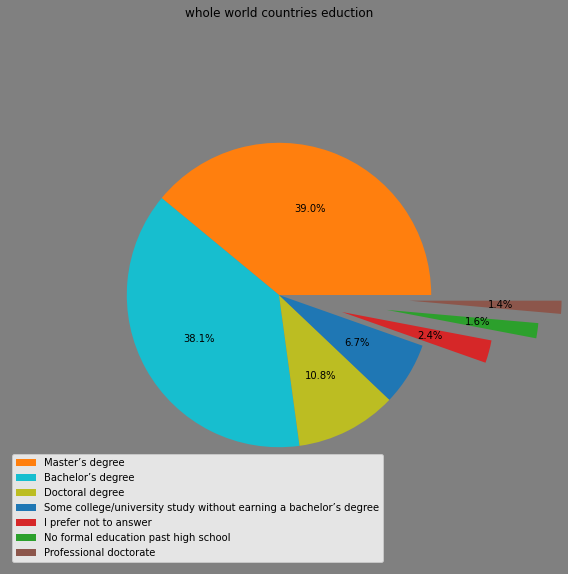

In [17]:
# the degree of all partiptions
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10)) 
fig.patch.set_facecolor('grey')
explode=[0,0,0,0,0.3,0.5,0.6]
colors= ['tab:orange', 'tab:cyan', 'tab:olive', 'tab:blue', 'tab:red', 'tab:green','tab:brown']



wholeworldeducation=df1['Q4'].value_counts().sort_values(ascending=False)

axes.set_title('whole world countries eduction')
axes.pie(wholeworldeducation,autopct='%1.1f%%',explode=explode ,colors=colors,radius=0.7)
axes.legend(labels=wholeworldeducation.index ,fontsize=10,loc='lower left')



Most of the participations have masters degree then bachelor degree

Text(0.5, 1.0, 'whole world countries eduction')

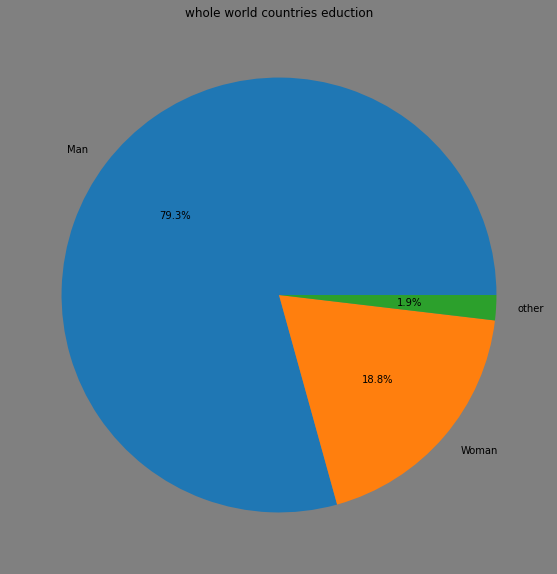

In [18]:
#genres of those who participated
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10)) 
fig.patch.set_facecolor('grey')



wholeworldgender=others.value_counts().sort_values(ascending=False)


axes.pie(wholeworldgender,labels=wholeworldgender.index,autopct='%1.1f%%')
axes.set_title('whole world countries eduction')

Men are the dominant genre in the website

Text(0, 0.5, 'profession')

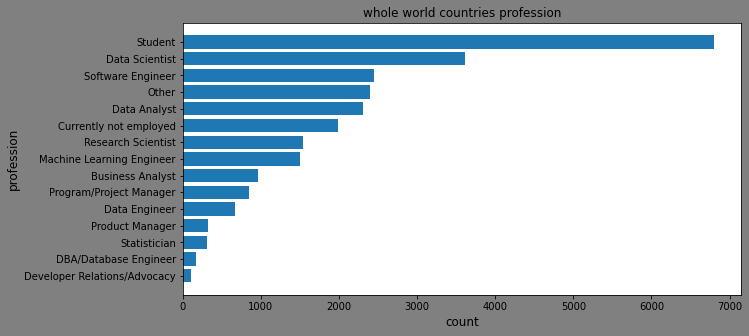

In [19]:
from matplotlib import font_manager as fm
non_arab_cols['Q5'].value_counts().sort_values()

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,5)) 
fig.patch.set_facecolor('grey')

wholeworldprofession=df1['Q5'].value_counts().sort_values()

axes.barh(wholeworldprofession.index,wholeworldprofession  )
axes.set_title('whole world countries profession',fontsize=12)
axes.set_xlabel('count',fontsize=12)
axes.set_ylabel('profession',fontsize=12)


Students are the dominant profession in this survey

Text(0, 0.5, 'no.of users')

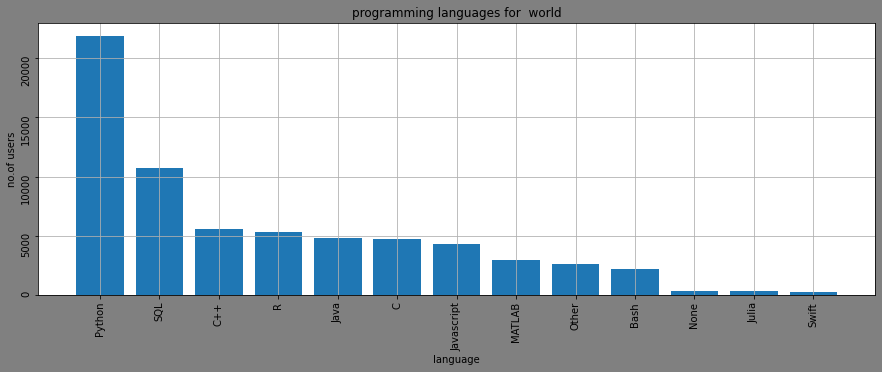

In [20]:
import operator

lan_whole_world=df1.columns[arabs_cols.columns.str.contains('Q7')]

dic9q={}

for  col in lan_whole_world:
    key=df1[col].value_counts().index[0]
    dic9q[key]=df1[col].value_counts()[0]
dic9q=dict(sorted(dic9q.items()  ,key=operator.itemgetter(1),reverse=True))    
dic9q=pd.Series(dic9q)

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
fig.patch.set_facecolor('grey')

axis.bar(dic9q.index,dic9q.values)
axis.grid(True)
axis.tick_params(labelrotation=90)
axis.set_title('programming languages for  world')
axis.set_xlabel('language')
axis.set_ylabel('no.of users')

Python is the most popular language

# Conclusions
Men are the most dominant genre 

python is the most popular genre

non arabs are considered the majority of the people 

student is the dominant profession

the most degree is'Masters degree ' then 'bachelors degree'

the biggest age group is 25-29

# Limitaions
-This data set dont represent the whole population in the IT world

-This data set for only who replied for the survey it may not represent evey one on kaggle.com